In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
tickers = ['PG', 'BEI.DE']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [8]:
sec_data.tail()

,PG,BEI.DE
Date,,
2020-05-04,115.769997,91.900002
2020-05-05,116.010002,89.279999
2020-05-06,113.099998,91.000000
2020-05-07,112.169998,92.239998
2020-05-08,115.949997,94.279999


In [9]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [10]:
sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2020-05-04,-0.009029,NaN
2020-05-05,0.002071,-0.028924
2020-05-06,-0.025404,0.019082


## PG

In [11]:
sec_returns['PG'].mean()

0.00029420685185424934

In [12]:
sec_returns['PG'].mean() * 250

0.07355171296356233

In [13]:
sec_returns['PG'].std()

0.011959797319592458

In [14]:
sec_returns['PG'].std() * 250 ** 0.5

0.18910099941944447

## Beiersdorf

In [15]:
sec_returns['BEI.DE'].mean()

0.00024669574729039846

In [16]:
sec_returns['BEI.DE'].mean() * 250

0.06167393682259961

In [17]:
sec_returns['BEI.DE'].std()

0.013775542682640198

In [18]:
sec_returns['BEI.DE'].std() * 250 ** 0.5

0.21781045441004543

***

In [19]:
print (sec_returns['PG'].mean() * 250)
print (sec_returns['BEI.DE'].mean() * 250)

0.07355171296356233
0.06167393682259961


In [20]:
sec_returns['PG', 'BEI.DE'].mean() * 250

KeyError: ('PG', 'BEI.DE')

In [21]:
sec_returns[['PG', 'BEI.DE']].mean() * 250

PG        0.073552
BEI.DE    0.061674
dtype: float64

In [22]:
sec_returns[['PG', 'BEI.DE']].std() * 250 ** 0.5

PG        0.189101
BEI.DE    0.217810
dtype: float64

## Covariance and Correlation


\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

In [23]:
PG_var = sec_returns['PG'].var() 
PG_var

0.00014303675192573094

In [24]:
BEI_var = sec_returns['BEI.DE'].var() 
BEI_var

0.00018976557620124188

In [25]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.03575918798143273

In [26]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.04744139405031047

***

In [27]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000143,0.000045
BEI.DE,0.000045,0.000190


In [28]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.035759,0.011242
BEI.DE,0.011242,0.047441


***

In [29]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.272557
BEI.DE,0.272557,1.000000


## Calculating Portfolio Risk

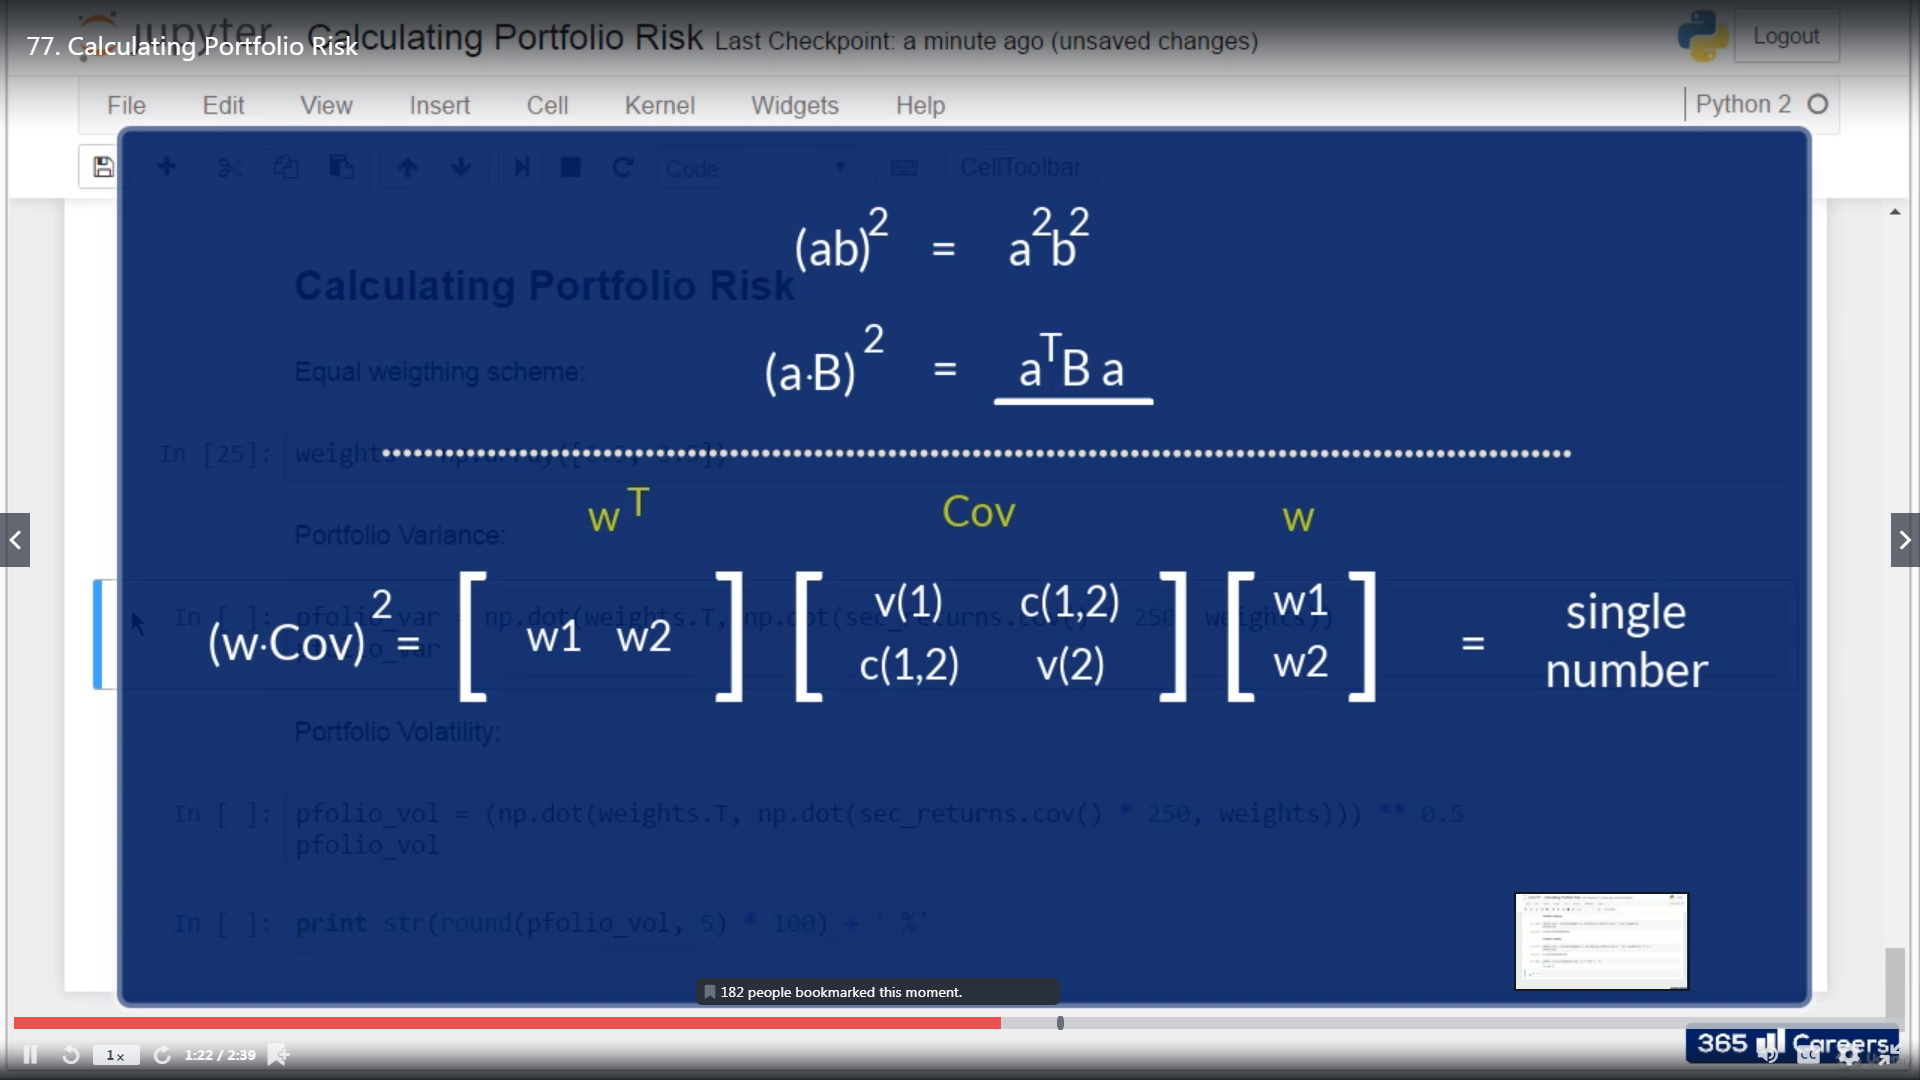

In [30]:
from IPython.display import Image
Image(filename='C:/Users/USER/Documents/Udemy Python for Finance/77 Calculating Portfolio Risk/Online Financial Data (APIs)/Python 3 APIs/Section 12 - 77 Calculating Porfolio Risk.png') 

Equal weigthing scheme:

In [31]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

--->>> numpy.dot() : dot product of two arrays

In [32]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.026420914189605814

Portfolio Volatility: ( ** 0.5)

In [33]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.16254511432093496

In [34]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

16.255 %
